In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.model_selection import cross_val_score
from sklearn import ensemble


In [2]:
agents = pd.DataFrame()
np.random.seed(338253)

In [3]:
numbers = np.random.normal(.5, .1, 1000)
ages = np.round(np.random.normal(36, 5, 1000), 0)
males = np.zeros((900,), dtype=int)
females = np.ones((100,), dtype=int)
genders = np.concatenate((males, females), axis=None)
reli = np.zeros((800,), dtype=int)
relo = np.ones((200,), dtype=int)
religions = np.concatenate((reli, relo), axis=None)
fighter = np.zeros((500,), dtype=int)
funding = np.ones((220,), dtype=int)
intel = np.full((1,220), 2)
command = np.full((1,60), 3)
roles = np.concatenate((fighter, funding, intel, command), axis=None)
np.random.shuffle(genders)
np.random.shuffle(religions)
np.random.shuffle(roles)
agr_bhv = np.random.ranf((1000,))
rel_fnt = np.random.ranf((1000,))
hst_twd_for = np.random.ranf((1000,))
lvl_rct_act = np.random.ranf((1000,))
crt_agr_lvl = np.random.ranf((1000,))
terrorist = np.ones((250,), dtype=int)
civil = np.zeros((750,), dtype=int)
is_terrorist = np.concatenate((terrorist, civil), axis=None)
np.random.shuffle(is_terrorist)

In [4]:
agents['ages'] = ages.astype(int)
agents['gender'] = genders
agents['religion'] = religions
agents['role'] = roles
agents['agr_bhv'] = agr_bhv
agents['rel_fnt'] = rel_fnt
agents['hst_twd_for'] = hst_twd_for
agents['lvl_rct_act'] = lvl_rct_act
agents['crt_agr_lvl'] = crt_agr_lvl
agents['prop_trr_act'] = is_terrorist

In [5]:
X = agents.drop('prop_trr_act', 1)
Y = agents['prop_trr_act']

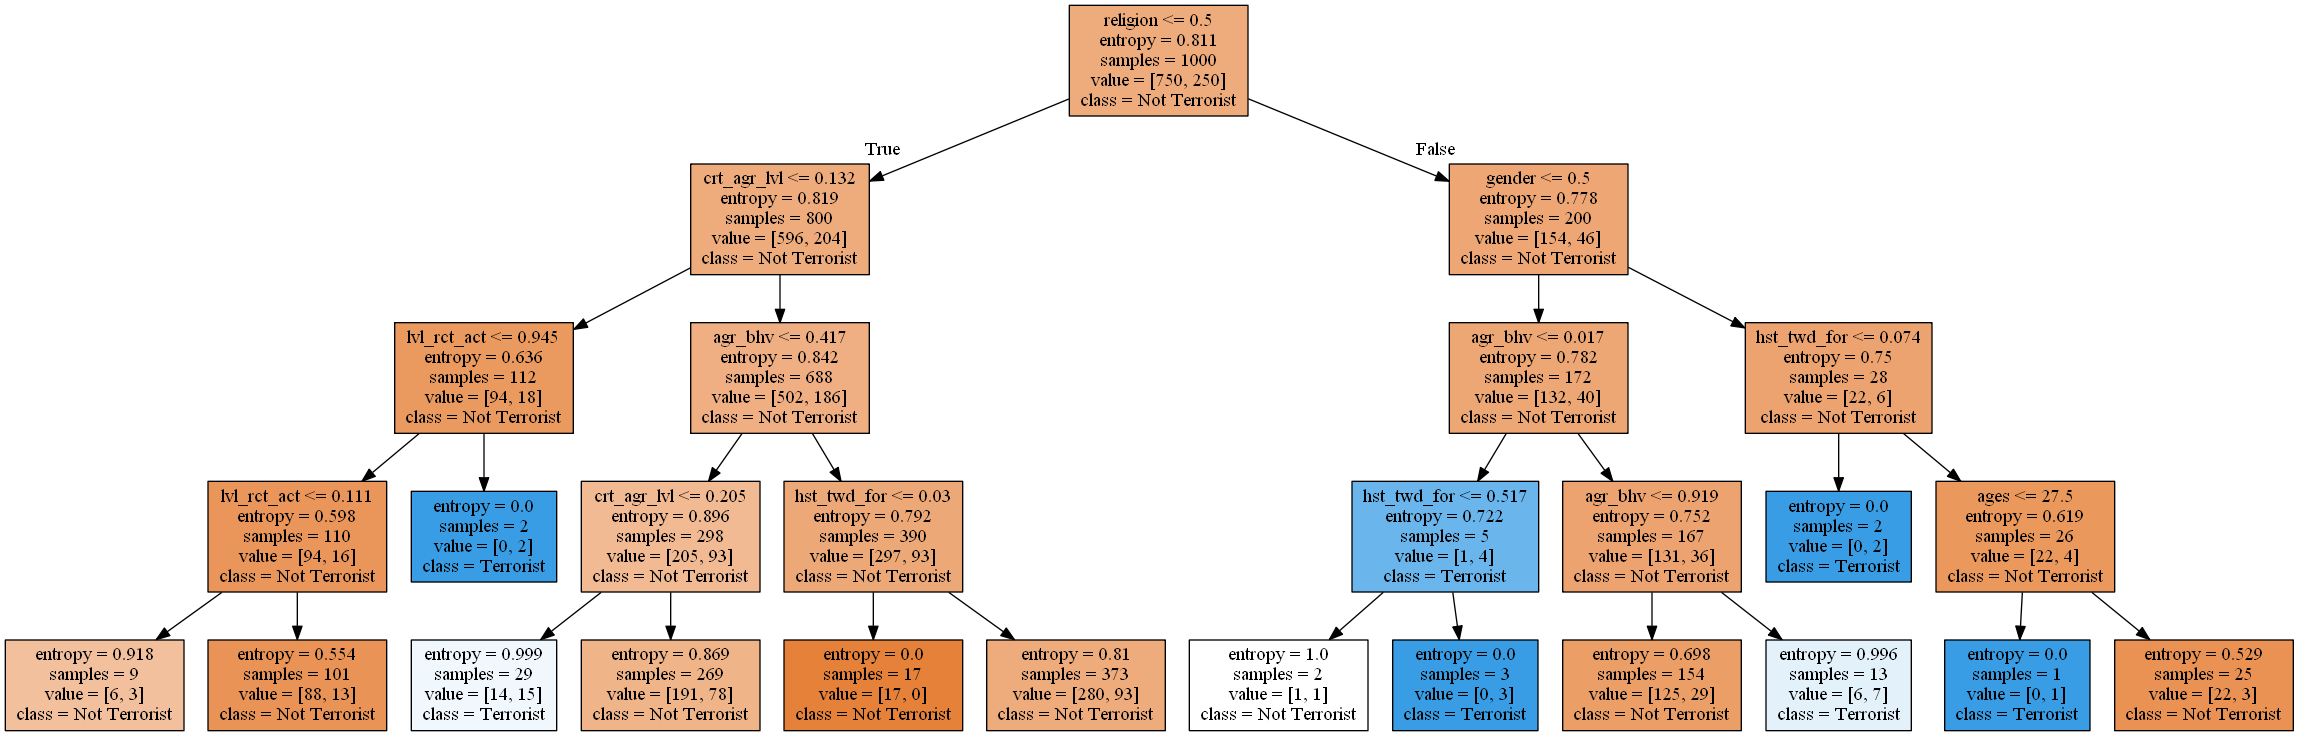

In [11]:
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=4
)
decision_tree.fit(X, Y)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Not Terrorist', 'Terrorist'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [12]:
cross_val_score(decision_tree, X, Y, cv=10)

array([0.74, 0.73, 0.74, 0.76, 0.75, 0.75, 0.76, 0.75, 0.74, 0.73])

In [8]:
rfc = ensemble.RandomForestClassifier()
X_for = agents.drop('prop_trr_act', 1)
Y_for = agents['prop_trr_act']
X_for = pd.get_dummies(X)

In [9]:
cross_val_score(rfc, X_for, Y_for, cv=10)

c:\users\lolium inter spinas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lolium inter spinas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lolium inter spinas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lolium inter spinas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators

array([0.72, 0.76, 0.74, 0.73, 0.75, 0.75, 0.74, 0.69, 0.74, 0.73])